<a href="https://colab.research.google.com/github/PorasS/AI/blob/master/CNNminist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Keras neural network for digits and fashion minist**
https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_06_2_cnn.ipynb
---
**Computer Vision**

This class will focus on computer vision. There are some important differences and similarities with previous neural networks.

We will usually use classification, though regression is still an option.
>The input to the neural network is now 3D (height, width, color)

>Data are not transformed, no z-scores or dummy variables.
Processing time is much longer.

>We now have different layer times: dense layers (just like before), convolution layers and max pooling layers.

>Data will no longer arrive as CSV files. TensorFlow provides some utilities for going directly from image to the input for a neural network.

**Computer Vision Data Sets**

There are many data sets for computer vision. Two of the most popular are the MNIST digits data set and the CIFAR image data sets.


**Other Resources**

Imagenet:Large Scale Visual Recognition Challenge 2014
 - Andrej Karpathy - PhD student/instructor at Stanford.
- CS231n Convolutional Neural Networks for Visual Recognition - - - Stanford course on computer vision/CNN's.
 -CS231n - GitHub
- ConvNetJS - JavaScript library for deep learning.


Notes:
>CNNs utilize overlapping fields of input to simulate features of biological eyes.


Convolution Layers
The first layer that we will examine is the convolutional layer. We will begin by looking at the hyper-parameters that you must specify for a convolutional layer in most neural network frameworks that support the CNN:

Number of filters
Filter Size
Stride
Padding
Activation Function/Non-Linearity
The primary purpose for a convolutional layer is to detect features such as edges, lines, blobs of color, and other visual elements. The filters can detect these features. The more filters that we give to a convolutional layer, the more features it can detect.

A filter is a square-shaped object that scans over the image. A grid can represent the individual pixels of a grid. You can think of the convolutional layer as a smaller grid that sweeps left to right over each row of the image. There is also a hyper parameter that specifies both the width and height of the square-shaped filter. The following figure shows this configuration in which you see the six convolutional filters sweeping over the image grid:

A convolutional layer has weights between it and the previous layer or image grid. Each pixel on each convolutional layer is a weight. Therefore, the number of weights between a convolutional layer and its predecessor layer or image field is the following:

[FilterSize] * [FilterSize] * [# of Filters]
For example, if the filter size were 5 (5x5) for 10 filters, there would be 250 weights.

You need to understand how the convolutional filters sweep across the previous layer’s output or image grid. Figure 6.CNN illustrates the sweep:



In [1]:
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))


11493376/11490434 [==============================] - 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Following code shows the mnist file contains.

In [2]:
#Display as text
from IPython.display import display
import pandas as pd

print("Shape for dataset: {}".format(x_train.shape))
print("Labels: {}".format(y_train))

#Single mnist digit
single = x_train[0]
print("Shape for single: {}".format(single.shape))

display(pd.DataFrame(single.reshape(28,28)))



Shape for dataset: (60000, 28, 28)
Labels: [5 0 4 ... 5 6 8]
Shape for single: (28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


Image (#106): which is digit '6'


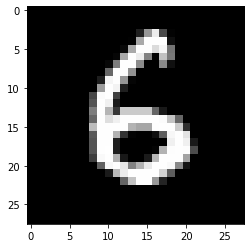

In [4]:
#Display an image
import matplotlib.pyplot as plt
import numpy as np
digit=106 # Change to choose a new digit
a = x_train[digit]
plt.imshow(a,cmap='gray',interpolation='nearest')
print("Image (#{}): which is digit '{}'".format(digit,y_train[digit]))